In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
pd.set_option('display.max_columns',300)

In [185]:
df= pd.read_csv('airbnb_data.csv').iloc[:,1:]
prices= pd.read_csv('prices.csv')

In [186]:
# Because of we have 1500 data
prices= prices.iloc[:1500,1]

In [187]:
df['prices']= prices

# Data Cleaning
### Burada bezi columnlar cox az melumat verir buna gore de bir deyer 95 faizden cox yer tutursa bunu sildim. Price target column da parcaladim, odenis ve odnis periodunu (per night or per week,month). Toplanilan dataset'de null deyerler scarpping zamani 0 ile ya da no "parameter name" seklinde yazmisam

In [188]:

for i in df.columns:
    if df[i].value_counts().iloc[0]>=df.shape[0]*.95:
        df.drop(columns=i,axis=1,inplace=True)

In [119]:
# df['rate'].value_counts().iloc[0]
df.shape

(1500, 42)

In [101]:
for i in df.columns:
    print(i)
    print()
    print(df[i].value_counts())
    print('_'*40)

rate

5.00    887
0.00    178
4.67     23
4.75     20
4.50     16
       ... 
4.36      1
4.41      1
4.22      1
4.99      1
3.50      1
Name: rate, Length: 86, dtype: int64
________________________________________
reviews

0.0      187
4.0       45
3.0       42
10.0      39
5.0       33
        ... 
239.0      1
125.0      1
279.0      1
86.0       1
809.0      1
Name: reviews, Length: 214, dtype: int64
________________________________________
location

Ukraine                 272
Brazil                  270
Argentina               243
Egypt                   229
United Arab Emirates    212
0.0                     178
Netherlands              96
Name: location, dtype: int64
________________________________________
guest

2.0     578
4.0     363
3.0     191
6.0      81
1.0      68
5.0      66
8.0      55
10.0     24
16.0     19
12.0     16
7.0      15
9.0       7
14.0      7
15.0      4
13.0      3
11.0      3
Name: guest, dtype: int64
________________________________________
bedroom


In [120]:
df.head()

,rate,reviews,location,guest,bedroom,bed,bath,Kitchen,Free parking on premises,Pets allowed,Patio or balcony,Backyard,Luggage dropoff allowed,Refrigerator,Air conditioning,Hair dryer,Long term stays allowed,Security cameras on property,Pool,Private hot tub,Garden view,Washer,Bathtub,City skyline view,Dedicated workspace,Free street parking,Elevator,Private patio or balcony,Mountain view,Studio,Dryer,Courtyard view,Private pool,Free washer – In unit,AC - split type ductless system,Waterfront,Shared pool,1,Hot tub,Microwave,Beach access – Beachfront,prices
0,4.76,55.0,Argentina,6.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114 per night
1,0.00,0.0,0.0,4.0,2.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,790 per night
2,5.00,3.0,Argentina,4.0,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219 per night
3,0.00,0.0,0.0,4.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425 per night
4,4.86,14.0,Argentina,8.0,4.0,7.0,4.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,574 per night


In [104]:
df.isnull().any().sum()

0

In [189]:
def func(x):
    t=x.split()
    if t[2].lower()=='night':
        return float(t[0]),t[2].lower()
    elif t[2].lower()=='month':
        return float(t[0]),t[2].lower()
    elif t[2].lower()=='week':
        return float(t[0]),t[2].lower()
res= df['prices'].apply(func)
df['prices']= res.apply(lambda x: float(x[0]))
df.insert(3,'type',res.apply(lambda x: x[1]))

In [190]:
df.head()

,rate,reviews,location,type,guest,bedroom,bed,bath,Kitchen,Free parking on premises,Pets allowed,Patio or balcony,Backyard,Luggage dropoff allowed,Refrigerator,Air conditioning,Hair dryer,Long term stays allowed,Security cameras on property,Pool,Private hot tub,Garden view,Washer,Bathtub,City skyline view,Dedicated workspace,Free street parking,Elevator,Private patio or balcony,Mountain view,Studio,Dryer,Courtyard view,Private pool,Free washer – In unit,AC - split type ductless system,Waterfront,Shared pool,1,Hot tub,Microwave,Beach access – Beachfront,prices
0,4.76,55.0,Argentina,night,6.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0
1,0.00,0.0,0.0,night,4.0,2.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,790.0
2,5.00,3.0,Argentina,night,4.0,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
3,0.00,0.0,0.0,night,4.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425.0
4,4.86,14.0,Argentina,night,8.0,4.0,7.0,4.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,574.0


# Preprocessing

In [191]:
from sklearn.model_selection import train_test_split

In [355]:
x_train,x_test,y_train,y_test= train_test_split(df[[i for i in df.columns if i!='prices']],df['prices'],shuffle=True)

In [270]:
# POlynomial features
col_poly= []
for i in x_train.columns:
    if x_train[i].nunique()>5 and x_train[i].dtype=='float64':
        col_poly.append(i)

In [271]:
from sklearn.preprocessing import PolynomialFeatures

In [272]:
poly= PolynomialFeatures(interaction_only=True)
train_poly= pd.DataFrame(poly.fit_transform(x_train[col_poly])[:,1:],columns=poly.get_feature_names_out(col_poly)[1:],\
                         index=x_train.index)
x_train.drop(columns=col_poly,axis=1,inplace=True)

In [278]:
x_train= pd.concat([x_train,train_poly],axis=1)

In [305]:
# Categoric data encoding
col_dummies= x_train.select_dtypes('O').columns
x_train= pd.get_dummies(x_train,columns=col_dummies)

## hamsi birlikde

In [499]:
x_train,x_test,y_train,y_test= train_test_split(df[[i for i in df.columns if i!='prices']],df['prices'],shuffle=True)
def prep(x):
    col_poly= []
    for i in x.columns:
        if x[i].nunique()>5 and x[i].dtype=='float64':
            col_poly.append(i)
    poly= PolynomialFeatures(interaction_only=True)
    train_poly= pd.DataFrame(poly.fit_transform(x[col_poly])[:,1:],columns=poly.get_feature_names_out(col_poly)[1:],\
                             index=x.index)
    x= x.drop(columns=col_poly,axis=1)
    x= pd.concat([x,train_poly],axis=1)  
        # Categoric data encoding
    col_dummies= x.select_dtypes('O').columns
    x= pd.get_dummies(x,columns=col_dummies)
    return x
x_pr_test= prep(x_test)
x_pr_train= prep(x_train)

In [378]:
from sklearn.metrics import mean_squared_error as mse,median_absolute_error as mae

In [367]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [368]:
?RandomForestRegressor

In [388]:
rf= RandomForestRegressor(verbose=True)
param_space={'max_depth':[10],'min_samples_split':[16,19,25]}
grid=GridSearchCV(rf,param_space,cv=2)
grid.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=2, estimator=RandomForestRegressor(verbose=True),
             param_grid={'max_depth': [10],
                         'min_samples_split': [16, 19, 30, 50]})

In [422]:
x_train


,Kitchen,Free parking on premises,Pets allowed,Patio or balcony,Backyard,Luggage dropoff allowed,Refrigerator,Air conditioning,Hair dryer,Long term stays allowed,Security cameras on property,Pool,Private hot tub,Garden view,Washer,Bathtub,City skyline view,Dedicated workspace,Free street parking,Elevator,Private patio or balcony,Mountain view,Studio,Dryer,Courtyard view,Private pool,Free washer – In unit,AC - split type ductless system,Waterfront,Shared pool,1,Hot tub,Microwave,Beach access – Beachfront,rate,reviews,guest,bedroom,bed,bath,rate reviews,rate guest,rate bedroom,rate bed,rate bath,reviews guest,reviews bedroom,reviews bed,reviews bath,guest bedroom,guest bed,guest bath,bedroom bed,bedroom bath,bed bath,location_0.0,location_Argentina,location_Brazil,location_Egypt,location_Netherlands,location_Ukraine,location_United Arab Emirates,type_night
275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.63,264.0,4.0,1.0,3.0,1.0,1222.32,18.52,4.63,13.89,4.63,1056.0,264.0,792.0,264.0,4.0,12.0,4.0,3.0,1.0,3.0,0,1,0,0,0,0,0,1
888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.50,6.0,2.0,0.0,1.0,1.0,27.00,9.00,0.00,4.50,4.50,12.0,0.0,6.0,6.0,0.0,2.0,2.0,0.0,0.0,1.0,0,0,0,0,0,0,1,1
1414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,148.0,4.0,1.0,3.0,1.0,740.00,20.00,5.00,15.00,5.00,592.0,148.0,444.0,148.0,4.0,12.0,4.0,3.0,1.0,3.0,0,0,0,0,1,0,0,1
1097,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,1.0,4.0,0.0,2.0,1.0,5.00,20.00,0.00,10.00,5.00,4.0,0.0,2.0,1.0,0.0,8.0,4.0,0.0,0.0,2.0,0,0,0,0,0,0,1,1
811,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,4.0,3.0,3.0,2.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,12.0,12.0,8.0,9.0,6.0,6.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.67,89.0,2.0,1.0,1.0,1.0,415.63,9.34,4.67,4.67,4.67,178.0,89.0,89.0,89.0,2.0,2.0,2.0,1.0,1.0,1.0,0,1,0,0,0,0,0,1
1317,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,30.0,7.0,2.0,5.0,1.0,150.00,35.00,10.00,25.00,5.00,210.0,60.0,150.0,30.0,14.0,35.0,7.0,10.0,2.0,5.0,0,0,0,0,0,1,0,1
863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.89,18.0,3.0,1.0,1.0,0.0,88.02,14.67,4.89,4.89,0.00,54.0,18.0,18.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,1
1298,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,89.0,3.0,1.0,4.0,0.0,445.00,15.00,5.00,20.00,0.00,267.0,89.0,356.0,0.0,3.0,12.0,0.0,4.0,0.0,0.0,0,0,0,0,0,1,0,1


<AxesSubplot:>

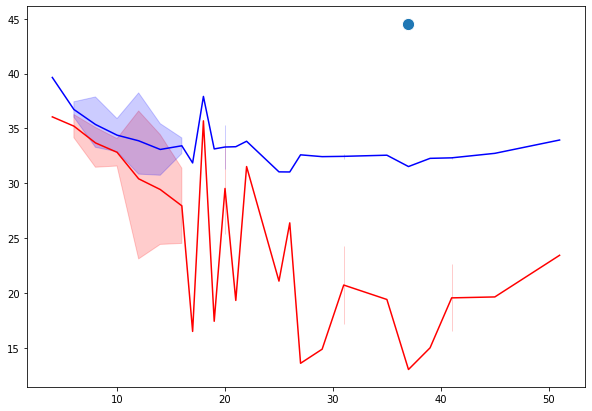

In [493]:
max_depth=[2,4,6,10,15,25,35]
min_samples_split=[2,4,6,10,16]
plt.figure(figsize=(10,7))
mae_train=[]
mae_test= []
tmm=[]
error=9999
for dep in max_depth:
    for samp in min_samples_split:
        rf= RandomForestRegressor(max_depth= dep,min_samples_split=samp)
        rf.fit(x_pr_train,y_train)
        tmm.append(dep+samp)
        mae_train.append(mae(y_train,rf.predict(x_pr_train)))
        mae_test.append(mae(y_test,rf.predict(x_pr_test)))
        if error>(mae_train[-1]+mae_test[-1]):
            error=mae_train[-1]+mae_test[-1]
            dp=dep
            sp= samp
# plt.subplot(2,2,1)
sns.lineplot(x=tmm,y=mae_train,color='red')
# plt.subplot(2,2,1)
sns.lineplot(x=tmm,y=mae_test,color='blue')
sns.scatterplot(x=dp+sp,y=[error],s=150)

<AxesSubplot:>

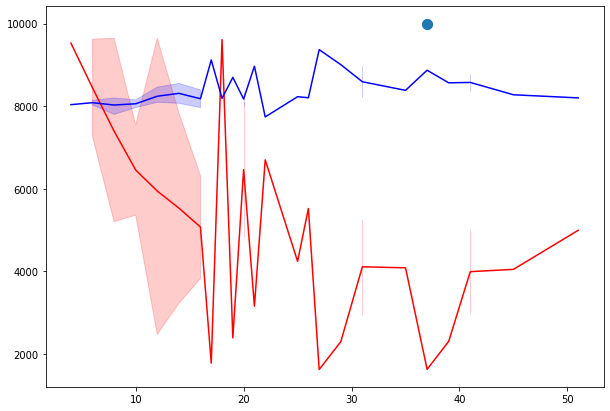

In [507]:
max_depth=[2,4,6,10,15,25,35]
min_samples_split=[2,4,6,10,16]
plt.figure(figsize=(10,7))
mse_train=[]
mse_test= []
tmm=[]
error=9999
for dep in max_depth:
    for samp in min_samples_split:
        rf= RandomForestRegressor(max_depth= dep,min_samples_split=samp)
        rf.fit(x_pr_train,y_train)
        tmm.append(dep+samp)
        mse_train.append(mse(y_train,rf.predict(x_pr_train)))
        mse_test.append(mse(y_test,rf.predict(x_pr_test)))
        if error>(mse_train[-1]+mse_test[-1]):
            error=mse_train[-1]+mse_test[-1]
            dp=dep
            sp= samp
# plt.subplot(2,2,1)
sns.lineplot(x=tmm,y=mse_train,color='red')
# plt.subplot(2,2,1)
sns.lineplot(x=tmm,y=mse_test,color='blue')
sns.scatterplot(x=dp+sp,y=[error],s=150)

In [502]:
# yoxlanis
rf= RandomForestRegressor(max_depth= dp,min_samples_split=dp)
rf.fit(x_pr_train,y_train)
print('train',mae(y_train,rf.predict(x_pr_train)))
print('test',mae(y_test,rf.predict(x_pr_test)))

train 26.154187339623576
test 30.935838690487344


In [339]:
np.sqrt(mse(y_train,rf.predict(x_train)))

44.620004785055066

In [503]:
np.sqrt(mse(y_train,np.random.randint(min(y_train),max(y_train),size=len(y_train))))

508.55091212406865

In [505]:
np.sqrt(mse(y_test,rf.predict(x_pr_test)))

89.0239189393188

In [364]:
np.sqrt(mse(y_train,rf.predict(prep(x_train))))

57.26324045258912